In [21]:
# !pip install yfinance pandas numpy matplotlib scikit-learn tensorflow


import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [22]:
try:
    data = yf.download('GOOG', start="2006-01-01", end="2025-01-15")
    if data.empty:
        print("Error: No data downloaded. Check ticker symbol or date range.")
        exit()
except Exception as e:
    print(f"Error downloading data: {e}")
    exit()


data_close = data[['Close']]


print("Original Data Head:")
print(data_close.head())

[*********************100%***********************]  1 of 1 completed

Original Data Head:
Price           Close
Ticker           GOOG
Date                 
2006-01-03  10.789018
2006-01-04  11.037157
2006-01-05  11.185892
2006-01-06  11.543353
2006-01-09  11.574091


In [23]:
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data_close.values)

# Create sequences (using 60 days to predict the next day)
sequence_length = 60
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0]) # Corrected slicing and indexing
    y.append(scaled_data[i, 0]) # Append the scalar value

# Convert lists to NumPy arrays
X, y = np.array(X), np.array(y)

# Reshape X to be [samples, time steps, features] as required by LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

print(f"\nShape of X_train: {X.shape}")
print(f"Shape of y_train: {y.shape}")



Shape of X_train: (4729, 60, 1)
Shape of y_train: (4729,)


In [24]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1))) # Corrected parameter name
model.add(LSTM(50, return_sequences=False)) # Corrected method call, return_sequences=False for last LSTM
model.add(Dense(1)) # Corrected method call

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error') # Corrected quote matching and parameter name

# Train the model (consider more epochs for real training)
print("\nTraining model...")
# Increased epochs slightly for demonstration, adjust as needed
model.fit(X, y, epochs=10, batch_size=32, verbose=1) # Corrected method call and parameter name

# Predict on the training data (for demonstration; ideally use a separate test set)
print("\nMaking predictions...")
predicted_scaled = model.predict(X)


Training model...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0171
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - loss: 2.3814e-04
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - loss: 2.3793e-04
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - loss: 2.4219e-04
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 2.1140e-04
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 2.0752e-04
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 1.9976e-04
Epoch 8/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - loss: 1.8245e-04
Epoch 9/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 1.9696e-04
Epoch 10/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 1.5944e-04

Making predictions...
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step


In [25]:
# Undo scaling
# Reshape y to 2D array for inverse_transform if it's not already
if y.ndim == 1:
    y_reshaped = y.reshape(-1, 1)
else:
    y_reshaped = y

predicted_prices = scaler.inverse_transform(predicted_scaled) # Corrected variable name and method name
actual_prices = scaler.inverse_transform(y_reshaped) # Corrected method name and use reshaped y



Plotting results...


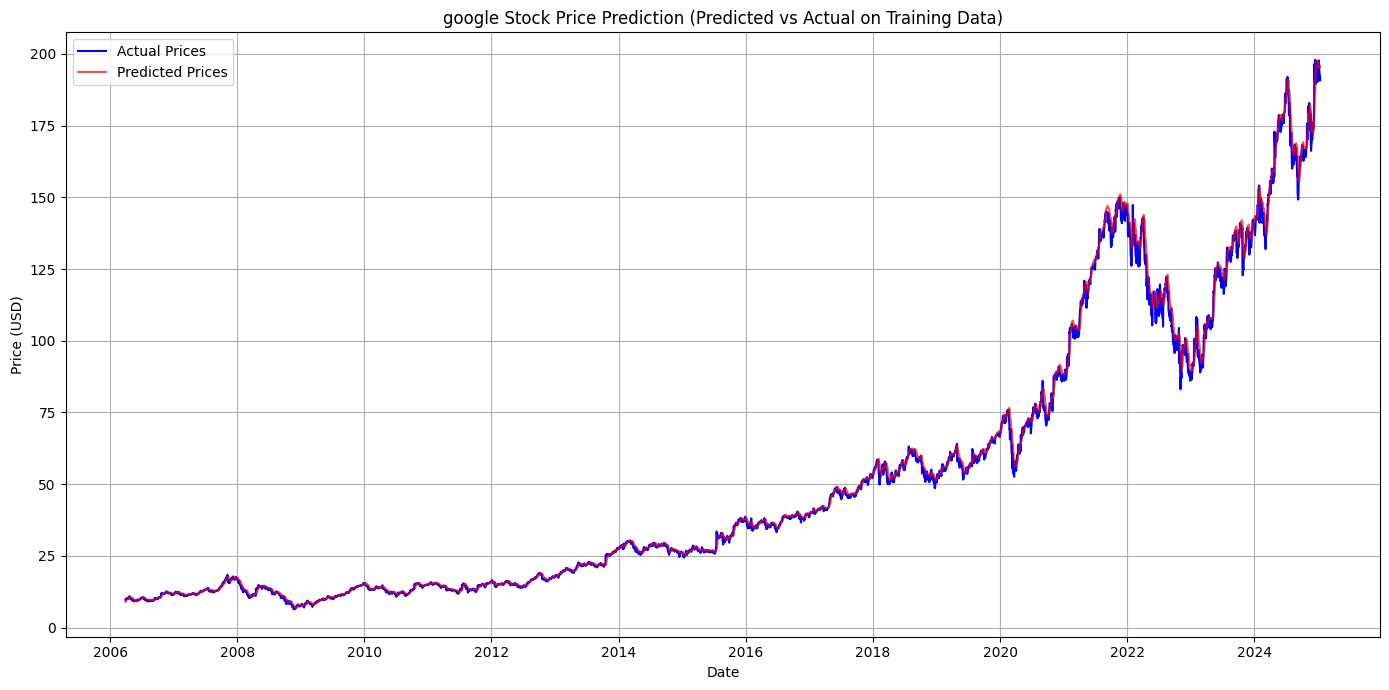


Script finished.


In [26]:
# Plot results
print("\nPlotting results...")
plt.figure(figsize=(14, 7)) # Corrected parameter name
plt.plot(data_close.index[sequence_length:], actual_prices, label='Actual Prices', color='blue') # Use date index for x-axis
plt.plot(data_close.index[sequence_length:], predicted_prices, label='Predicted Prices', color='red', alpha=0.7) # Corrected label quote and use date index
plt.title('google Stock Price Prediction (Predicted vs Actual on Training Data)')
plt.xlabel('Date') # Changed label to Date
plt.ylabel('Price (USD)') # Corrected closing quote
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nScript finished.")